# Input Representations

In this notebook, we'll study various audio input representations that are used for music classification. Choosing the right input representation is crucial to successful training of neural networks. This may sound against the spirit of deep learning -- assume minimally and let the model learn.

This is because the optimal choice of audio input representations is more difficult than in other domains as you'll see here. In other words, this is an important design choices that music/audio researchers should make as opposed to people in natural language processing or computer vision.

```{note}

In this section, you will be introduced to various input representations as well as their relationship with our perception of sound. The connection is rarely mentioned, but it provides rigorous explainations about why we choose some design choices. 


```

## Biological Plausibility

Neural networks are inspired by biological neural networks. However, that doesn't mean we have to follow every detail of them. It is a classic debate topic where airplanes are often mentioned as a counterexample.

How about audio representations? Does biological plausibility matter when designing it? 

The answer would depend on the problem we solve as well as the empirical evidence. For music classifcation,  the answer seems to be "Yes". The way we perceive sounds decides what we care about and how we label music. Our understanding of music, then, defines music classification tasks. For example, no one cares about pattern recognition of inaudible frequency ranges.

In this section, I will help the readers to connect many choices we make regarding input representations to related concepts in psychoacoustics, a study of our perception of sound.

---

Alright, let's get started! Let me prepare some modules and variables first.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd

plt.rcParams.update({'font.size': 16, 'axes.grid': True})

SR = 22050  # sample rate of audio
wide = (18, 3)  # figure size
big = (18, 8)  # figure size

print(f"{librosa.__version__=}")

librosa.__version__='0.8.1'


In [2]:
src, sr = librosa.load('are-you-here-with-me(mono).mp3', sr=SR, mono=True, duration=5.0)

print(f'{src.shape=}, {sr=}')

/Users/admin/miniconda3/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


src.shape=(110250,), sr=22050


## Waveforms

The first representation we'll discuss is waveforms.


```{note}
Waveforms are records of amplitudes of audio signals.
```

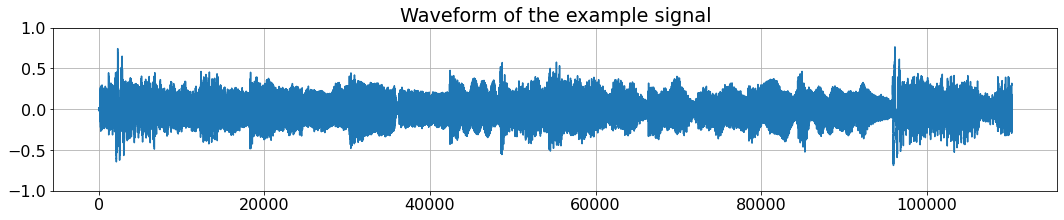

In [3]:
plt.figure(figsize=wide)  # plot using matplotlib
plt.title('Waveform of the example signal')
plt.plot(src);plt.ylim([-1, 1]);

In [4]:
ipd.Audio(src, rate=sr) # load a NumPy array

Effective visualization of audio representations is trickier than you think. FYI, you can ask `librosa` to take care of it as below. We'll use both `matplotlib` directly and `librosa` depending on what I want to display.

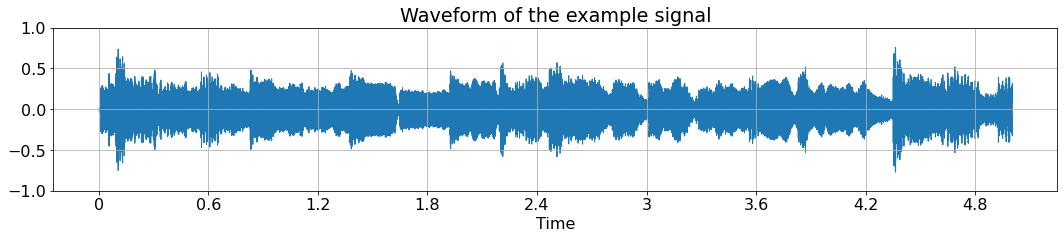

In [5]:
plt.figure(figsize=wide)  # plot using librosa
plt.title('Waveform of the example signal')
librosa.display.waveshow(src, sr=22050);plt.ylim([-1, 1]);

This 5-second 22,050-Hz sampled mono audio has a shape of `(110250, )`. So, what is this long 1-dimensional array? It is a representation for (diaphragms of) speakers, whose goal is to produce the sound (the change of pressure in the air) correctly.

🔍 Let's zoom into the waveform

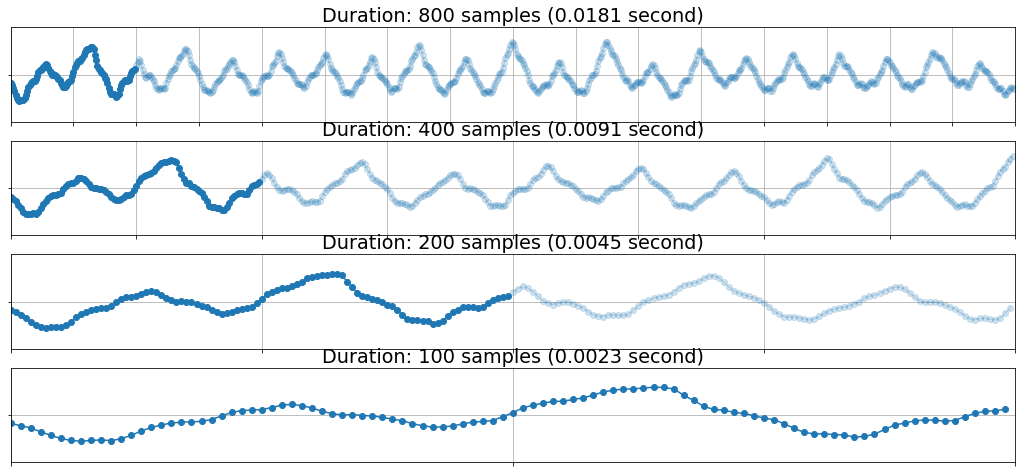

In [6]:
plt.figure(figsize=big)
plt.subplot(4, 1, 1)
plt.plot(np.arange(0, 100), src[10000:10000 + 100], marker='o'); 
plt.plot(np.arange(100, 800), src[10100:10000 + 800], marker='o', alpha=0.2, c='#1f77b4');plt.yticks([0], [''])
plt.title(f'Duration: 800 samples ({800/44100:0.4f} second)'); plt.xlim([0, 800]); plt.xticks(range(0, 801, 50), [])
plt.ylim([-0.5, 0.5])

plt.subplot(4, 1, 2)
plt.plot(np.arange(0, 100), src[10000:10000 + 100], marker='o'); 
plt.plot(np.arange(100, 400), src[10100:10000 + 400], marker='o', alpha=0.2, c='#1f77b4');plt.yticks([0], [''])
plt.title(f'Duration: 400 samples ({400/44100:0.4f} second)'); plt.xlim([0, 400]); plt.xticks(range(0, 401, 50), [])
plt.ylim([-0.5, 0.5])

plt.subplot(4, 1, 3)
plt.plot(np.arange(0, 100), src[10000:10000 + 100], marker='o'); 
plt.plot(np.arange(100, 200), src[10100:10000 + 200], marker='o', alpha=0.2, c='#1f77b4');plt.yticks([0], [''])
plt.title(f'Duration: 200 samples ({200/44100:0.4f} second)'); plt.xlim([0, 200]); plt.xticks(range(0, 201, 50), [])
plt.ylim([-0.5, 0.5])

plt.subplot(4, 1, 4)
plt.plot(src[10000:10000 + 100], marker='o');plt.yticks([0], [''])
plt.title(f'Duration: 100 samples ({100/44100:0.4f} second)'); plt.xlim([0, 100]); plt.xticks(range(0, 101, 50), [])
plt.ylim([-0.5, 0.5]);


As the raw end of audio signals, waveforms were used as input of music classification models in {cite}`dieleman2014end`, {cite}`lee2017sample`, etc.
Is waveform the best representation for neural networks? It depends, but usually it's not. 

  - If you have a lot of data, it's worth trying with the minimally assuming, waveform-based models such as Sample-CNN ({cite}`lee2017sample`). Beware though, it's requires a large memory, lots of computation, and large-scale data.

What are the alternatives then? There is no single answer to the question. A bunch of types of **spectrograms** could be the answer depending on what you're looking for.

But - first of all, what are spectrograms?

## Spectrograms: time-frequency representations


```{note}
Spectrogram refers to a (2D) visualization of sound. 
```



Text(0.5, 1.0, 'A Spectrogram')

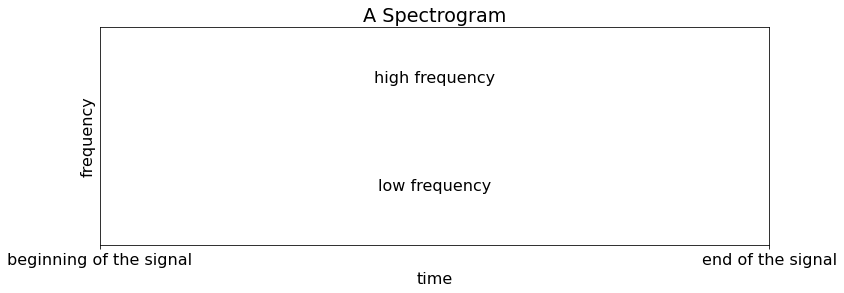

In [28]:
plt.figure(figsize=(12, 4))
plt.plot()
plt.xlabel('time'); plt.ylabel('frequency')
plt.xlim([-2, 2]); plt.ylim([-2, 2])
plt.grid(False)
plt.text(0, -1, 'low frequency', ha='center')
plt.text(0, 1, 'high frequency', ha='center')
plt.xticks([-2, 2], ['beginning of the signal', 'end of the signal']);plt.yticks([]);
# plt.text(-2, -1.5, 'beginning of the signal')
plt.title('A Spectrogram')

Why is spectrogram a good representation? 

Let's think about how we perceive sound. The amplitudes of acoustic waves -- waveforms --  are what our eardrums respond to. The sound travels through our auditory system. At some point, it is then converted to a (sort of) 2-dimensional representation in the cochlear to perform some frequency analysis. This is done by the basilar membrane physically responding to a certain frequency component as below.

(Image from Wikipedia)

![basilar_membrane](../images/keunwoo/Uncoiled_cochlea_with_basilar_membrane_1_30.png)


This means that 2-dimensioal representations are biologically plausible, which is not bad.

Additionally, spectrograms are neural network-friendly because they fit well with properties of some popular architectures. For example, local correlation and the shift invariance of CNNs can be utilized nicely when we're using spectrograms. One would argue that the harmonic relationship along the frequency axis is hardly considered in CNNs. But i) we can modify the structure to take it into account {cite}`won2019automatic`, and its performance was on par with typical (non-harmonic) CNNs {cite}`won2020evaluation`. 

For the rest of this section, we'll focus on three types of spectrogram. They are STFT, melspectrograms, or constant-Q transform (CQT). Let me first summarize their property from a deep learning point of view. 

```{note}
  - **STFT** has some good properties but its size is usually bigger than Melspectrograms or CQT. That means more computation and memory usage, so it is less desirable. 
  - **Melspectrogram** has been very popular for practical reasons. The performance is strong, its memory usage is small, and the computation is simple. This is probably everyone's go-to choice if you're not sure.
  - **Constant-Q Transform (CQT)** is quite similar to Melspectrogram for ML models. However, it is more computation heavy and is less available in softwares we use.
```

## STFT

STFT (short-time Fourier transform) is the most "raw" kind of spectrograms. It has two axes - time and frequency. 

  - It has a linear frequency resolution. Its frequency axis spans from 0 Hz (DC component) to `sample_rate / 2` Hz (aka Nyquist frequency). 
  - We can fully reconstruct the audio signal from a STFT. 
  - STFT consists of complex numbers.


In [44]:
n_fft = 512  # STFT parameter. Higher n_fft, higher frequency resolution you get.
hop_length = n_fft // 4  # STFT parameter. Smaller hop_length, higher time resolution.
stft_complex = librosa.stft(y=src, n_fft=n_fft, hop_length=hop_length)

print(f"{src.shape=}\n{stft_complex.dtype=}\n{stft_complex.shape=}\n{stft_complex[3, 3]=}\n")

src.shape=(110250,)
stft_complex.dtype=dtype('complex64')
stft_complex.shape=(257, 862)
stft_complex[3, 3]=(-0.9134862+0.22103079j)




The shape of `(257, 862)` means there are 257 frequency bands and 862 frames. 

  - 257 = (n_fft / 2) + 1. Originally, there are `n_fft` number of frequency bins. But, they are mirror image for real signals (such as audio signals) so we can discard the half. These bins include the boundaries, hence there is one more bin.
  - 862 = ceil(signal_length / hop_length) = ceil(110250 / 128) = 862. There could be a few more frames depending on how you handel the boundaries. 


But, we rarely use `stft_complex` as it is.

  - **Modification 1**: For analysis purposes, we usually use the magnitudes of STFT only. This is not only convenient but also biologically plausible since [the human auditory system is insensitive to phase information](https://ptolemy.berkeley.edu/eecs20/week8/phase.html). (Nevertheless, this doesn't mean it is always better to discard the phase information.)
    
In MIR literatures, STFT usually refers to the magnitude of STFT while the original, complex-numbered STFT is referred as "complex STFT".

```{note}
STFT has a linear frequency resolution and we often use magnitude of it.
```

👀 Let's see how a magnitude-STFT looks like.

stft.dtype=dtype('float32')
stft.shape=(257, 862)
stft[3, 3]=0.9398466



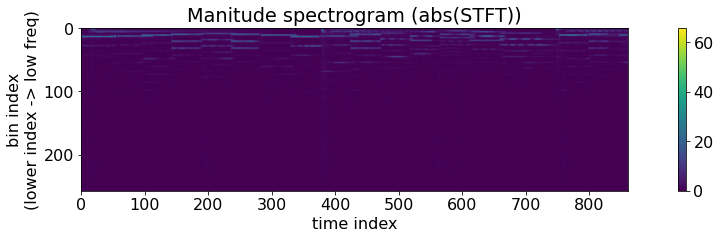

In [45]:
stft = np.abs(stft_complex)
print(f"{stft.dtype=}\n{stft.shape=}\n{stft[3, 3]=}\n")

plt.figure(figsize=wide)
img = plt.imshow(stft)
plt.colorbar(img)
plt.ylabel('bin index\n(lower index -> low freq)');plt.xlabel('time index')
plt.title('Manitude spectrogram (abs(STFT))');plt.grid(False);

Can you see the slight activations on the lower frequency (near the upper boundary)? That's the magnitudes of the STFT of our example signal. But this image looks pretty sparse.

Let's time-average the frequency distribution and plot it.

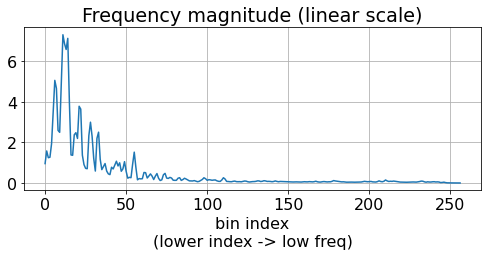

In [79]:
plt.figure(figsize=wide); plt.subplot(1, 2, 1)
stft_freq_distritubion = np.mean(stft, axis=1)  # axis=1 is the time axis.
plt.plot(stft_freq_distritubion)
plt.xlabel('bin index\n(lower index -> low freq)')
plt.title('Frequency magnitude (linear scale)');

Seems like the magnitude is much larger in the low frequency region. This is very common due to our nonliear perception of loudness per frequency, and this is why the spectrogram above didn't seem very clear to us.
And even worse, this kind of an extreme distribution is not good for neural networks. You can find more discussion on this in {cite}`choi2017comparison`.

The solution is to take `log()` to magnitude spectrograms.

- **Modification 2** After `abs()`, we compress the magnitude with `log()`. This is also biologically plausible - the human perception of loudness is much closer to a logarithmic scale than a linear scale (i.e., it follows [Weber–Fechner law](https://en.wikipedia.org/wiki/Weber%E2%80%93Fechner_law)).

Both of the modifications 1 and 2 are so common that people often omit them in papers. 

```{note}
By "STFT" in deep learning-related articles, people often mean log-magnitude STFT.
```

Remember that these modification have nothing to do with the total shape -- they are element-wise operations.

log_stft.dtype=dtype('float32')
log_stft.shape=(257, 862)


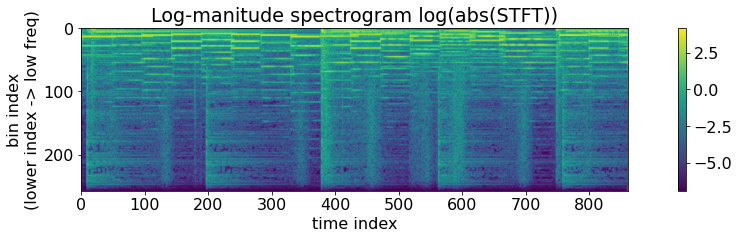

In [100]:
eps = 0.001
log_stft = np.log(np.abs(stft_complex) + eps)
print(f"{log_stft.dtype=}\n{log_stft.shape=}")

plt.figure(figsize=wide)
img = plt.imshow(log_stft)
plt.colorbar(img)
plt.ylabel('bin index\n(lower index -> low freq)');plt.xlabel('time index')
plt.title('Log-manitude spectrogram log(abs(STFT))');plt.grid(False);

ipd.Audio(src, rate=sr) # load a NumPy array

This is exactly what's happening in [Decibel scaling](https://en.wikipedia.org/wiki/Decibel). Decibel scaling is also logarithm mapping but with a few different choices of the constants (e.g., log10 vs log, etc) so that 0 dB becomes absolute silence and 130 dB becomes a really really loud sound. Check out the implementations in [`librosa.amplitude_to_db()`](https://librosa.org/doc/main/generated/librosa.amplitude_to_db.html) and [`librosa.power_to_db()`](https://librosa.org/doc/main/generated/librosa.power_to_db.html) for more correct and  numerically stable and decibel scaling.

Finally, it doesn't look so right when low-frequency is at the top of the image. Let's flip up-down to correct it.

In [101]:
eps = 0.001
log_stft = np.log(np.abs(stft_complex) + eps)
log_stft = np.flipud(log_stft)  # <-- Here! The rest of the code is hidden.

log_stft.dtype=dtype('float32')
log_stft.shape=(257, 862)



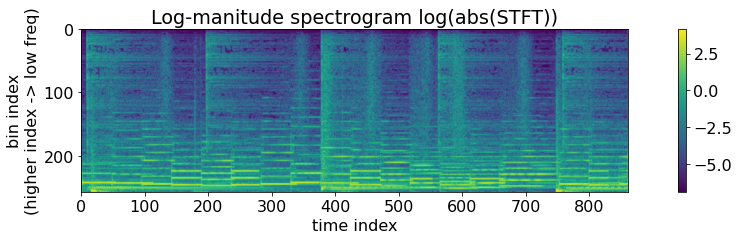

In [102]:
print(f"{log_stft.dtype=}\n{log_stft.shape=}\n")

plt.figure(figsize=wide)
img = plt.imshow(log_stft)
plt.colorbar(img)
plt.ylabel('bin index\n(higher index -> low freq)');plt.xlabel('time index')
plt.title('Log-manitude spectrogram log(abs(STFT))');plt.grid(False);

OK! This is the famous log-magnitude STFT. Quite often, people call it simply a STFT or a log-STFT. 

```{note}
People usually use log-magnitude STFT.
```

From here, I'll use `libros` more actively because i) the implementation of other representations is not trivial and ii) so that the x- and y-axes are nicely displayed in more convenient units.

Additionally, it's always safe to make your data zero-centered. That's also done quite nicely with the default parameters of `librosa`. 

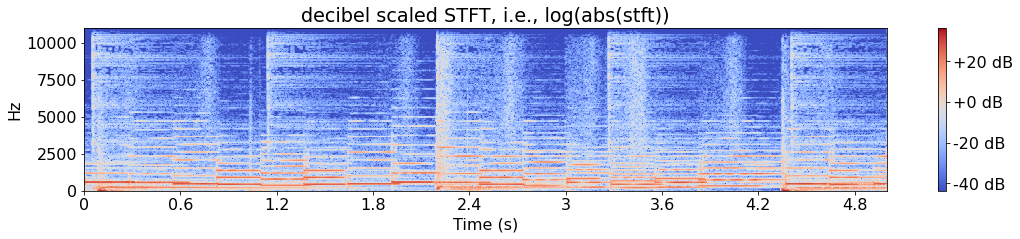

In [103]:
plt.figure(figsize=wide)
img = librosa.display.specshow(librosa.amplitude_to_db(stft), sr=SR, x_axis='s', y_axis='linear', hop_length=hop_length)
plt.colorbar(img, format="%+2.f dB")
plt.title('decibel scaled STFT, i.e., log(abs(stft))');

## Even more modifications

By computing log(abs(STFT)), we get a nice image of the sound. But, it is just a beginning! 


**Reasons for modifying the frequency scale**
 - Our perception of frequency is also nonlinear (approximately.. (drum rolls!..) logarithmic).
 - Similarly, we defined pitches in the octave (=logarithmic) scale

**Reasons why it's fine to remove some high frequency bands**
 - The highest frequency of original audio signals is usually 22kHz which is pretty far beyond our range. 
 - Similarly, the information in high-frequency ranges (e.g., f > 10kHz) is i) sparse, ii) not that necessary for most of MIR tasks, and iii) barely audible for us.

**Reason why, it's *better* to remove some high frequency bands**
 - Because we want to remove any redundant memory and computation especially in deep leanring.


Because of these, researchers have been using time-frequency representations that are even more modified than log(abs(STFT)). 

## Melspectrograms

Melspectrograms have been the top choices for music tagging and classification. But what is a melspectrogram?

Melspectrogram is a result of converting the linear frequency scale into the [*mel scale*](https://en.wikipedia.org/wiki/Mel_scale). Mel scale is invented to mimic the our perception of pitch. The popular implementation of these days assumes a linearity under 1 kHz and a logarithmic curve above 1 kHz. 



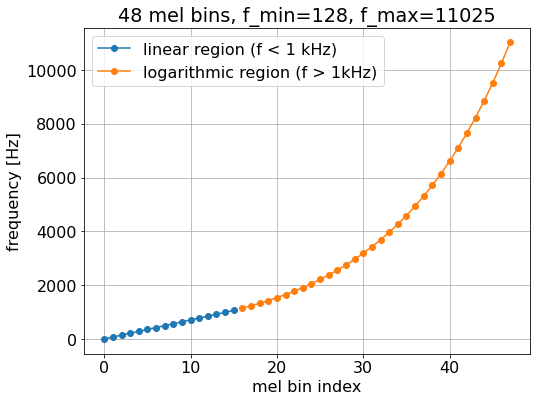

In [104]:
mel_scale = librosa.mel_frequencies(n_mels=48, fmin=0.0, fmax=11025.0, htk=False)

plt.figure(figsize=(8, 6))
plt.plot(np.arange(0, 16, 1), mel_scale[:16], marker='o', label='linear region (f < 1 kHz)')
plt.plot(np.arange(16, 48, 1), mel_scale[16:], marker='o', label='logarithmic region (f > 1kHz)')
plt.title('48 mel bins, f_min=128, f_max=11025')
plt.xlabel('mel bin index')
plt.ylabel('frequency [Hz]')

plt.legend();

```{note}
Melspectrogram is based on a mel-scale, which is nonlinear and approximates human perception.
```

**Benefits**
- It's reduces the number of frequency band greatly. For example, 1028 -> 128. What a deep learning-plausible number it becomes!
- It's simple and fast - the computation is a matrix multiplication of a pre-computed filterbank matrix.
- It's effective - the model works even better in many cases.

In [105]:
log_melgram = librosa.power_to_db(
    np.abs(
        librosa.feature.melspectrogram(src, sr=SR, n_fft=n_fft, hop_length=hop_length, power=2.0,
                                      n_mels=128)
    )
)
print(log_melgram.shape, stft.shape)  # 257 frequency bins became 128 mel bins.

(128, 862) (257, 862)


We can directly compare STFT and melspectrogram. 

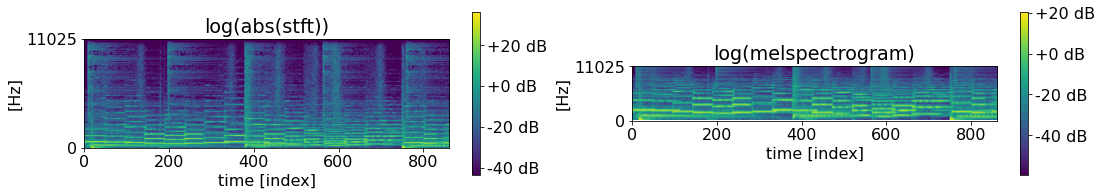

In [106]:
plt.figure(figsize=(wide))
plt.subplot(1, 2, 1)
img = plt.imshow(np.flipud(librosa.amplitude_to_db(stft)))
plt.colorbar(img, format="%+2.f dB")
plt.title('log(abs(stft))'); plt.grid(False); 
plt.yticks([0, n_fft//2], [str(SR // 2), '0']); plt.ylabel('[Hz]'); plt.xlabel('time [index]')

plt.subplot(1, 2, 2)
img = plt.imshow(np.flipud(log_melgram))
plt.colorbar(img, format="%+2.f dB")
plt.title('log(melspectrogram)');  plt.grid(False);plt.yticks([]);
plt.yticks([0, 128], [str(SR // 2), '0']); plt.ylabel('[Hz]'); plt.xlabel('time [index]');

A few observation:
 - Melspectrogram is smaller than STFT.
 - Even if it's smaller, the low frequency region has allocated more bins than it does in STFT.
 - The frequency range is the same. 

## Constant-Q Transform

As we've seen, melspectrograms are great! But it is just a simple aggregation of high-frequency bins into one. This means the frequency resolution of melspectrogram is bound by that of STFT. And there is always a trade-off between time and frequency resolutions in STFT. 

Constant-Q Transform is more radical. Why not having accurately octave scale representation? 

Its implementation is not trivial, but the idea is to use time-varying windows for different center frequency. Let's see the result.

In [107]:
log_cqt = librosa.amplitude_to_db(
    np.abs(
        librosa.cqt(src, sr=SR, hop_length=hop_length, n_bins=24*7, bins_per_octave=24, fmin=librosa.note_to_hz('C1'))
    )
)

Text(0.5, 1.0, 'log(cqt)')

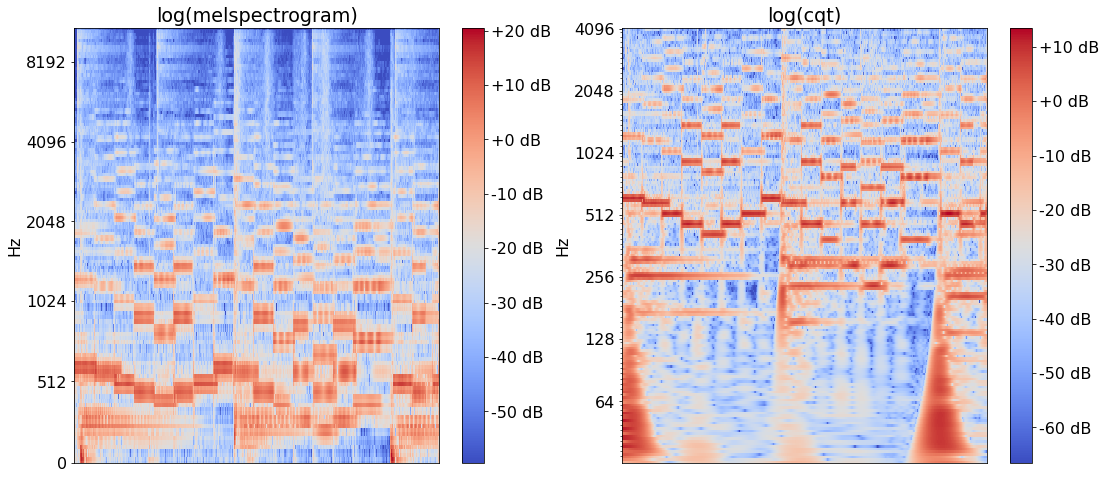

In [108]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
img = librosa.display.specshow(log_melgram, y_axis='mel', sr=SR, hop_length=hop_length)
plt.colorbar(img, format="%+2.f dB")
plt.title('log(melspectrogram)')

plt.subplot(1, 2, 2)
img = librosa.display.specshow(log_cqt, y_axis='cqt_hz', sr=SR, hop_length=hop_length, bins_per_octave=24)
plt.colorbar(img, format="%+2.f dB")
plt.title('log(cqt)')

The difference is pretty obvious here - we get a much better pitch resolution!

## Practical Issue: How to compute them?

There are several softwares that computes these representations. Take this information with a grain of salt because it will be outdated after releasing this book (2021 Nov).


### Waveforms

First of all, you get waveforms by simply loading the audio.
  - You'd need an audio codec (e.g., FFMPEG) if your audio comes in formats such as mp3, m4a, aac, or ogg. 
    - Usually, your audio file loader returns a floating-point data array where the amplitude is in `[-1.0, 1.0]`. But, the original `wav` file usually stores the amplitudes in `int16` format. (No worries though, `Float32` is precise enough to represent them.)
  - You can use [`scipy.io.wavfile.read`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html) to load PCM audio. 

### Spectrograms

There are various softwares and approaches to compute STFT, melspectrogram, and CQT.
  - On CPU
    - **librosa**: [librosa.stft](https://librosa.org/doc/latest/generated/librosa.stft.html) internally uses `stft` but with a more tailored and carefully chosen API with default values. It also includes functions to compute a [melspectrogram](https://librosa.org/doc/latest/generated/librosa.feature.melspectrogram.html) and a [CQT](https://librosa.org/doc/latest/generated/librosa.cqt.html) {cite}`mcfee2015librosa`.
    - **scipy**: [scipy.signal.stft](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.stft.html) is a cpu-based implementation of STFT using FFT {cite}`2020SciPy-NMeth`.
    - [**Essentia**](https://essentia.upf.edu/documentation.html) provides C++-based implementation of STFT and melspectrogram as well as their python bindings {cite}`bogdanov2013essentia`.
    
  - On CPU & GPU
    - **Torchaudio**: One can compute STFT using [`torchaudio.functional.spectrogram`](https://pytorch.org/audio/stable/functional.html#spectrogram). It also includes a wide variety of functions and utilities such as [`amplitude_to_DB`](https://pytorch.org/audio/stable/functional.html#amplitude-to-db) and [`resampling`](https://pytorch.org/audio/stable/functional.html#resample) {cite}`yang2021torchaudio`.
    - **nnAudio**: It has multiple versions of [CQT computation functions](https://kinwaicheuk.github.io/nnAudio/_autosummary/nnAudio.Spectrogram.html) as well as others e.g., STFT and melspectrogram. Its STFT computation is based on Conv1D, not FFT {cite}`cheuk2020nnaudio`.
    - **Tensorflow**: It has a native support of [stft](https://www.tensorflow.org/api_docs/python/tf/signal/stft). However, [it is slow on cpu](https://github.com/tensorflow/tensorflow/issues/6541), which might be critical if your model is going to be deployed on cpu-only machines. It, by the way, even has a [function to convert an STFT to melspectrogram](https://www.tensorflow.org/api_docs/python/tf/signal/linear_to_mel_weight_matrix) {cite}`abadi2016tensorflow`.
    - **kapre**: [kapre.time_frequency](https://kapre.readthedocs.io/en/latest/time_frequency.html) includes `tf.keras` layers such as STFT and melspectrogram as well as utilities as decibel conversion. Its STFT layer is a wrapper of `tf.signal.stft` {cite}`choi2017kapre`.


### Consistency between softwares

Not all the implementations are equal! Especially.. nothing. 

  - Default behavior such as padding may be different
  - There is no single canonical reference implementation of some concepts such as mel scale.
  - CQT is an approximation yet. There is no method to compute CQT with perfect reconstruction.

One should make sure that all the data are processed consistently. The easiest way is to have a single method that process all the data during training and after deployment. This may be tricky, but possible for most of the cases. See the comparisons and suggestions linked below for more information.

  - [Librosa and Scipy](https://gist.github.com/bmcfee/746e572232be36f3bd462749fb1796da)
  - [Librosa and Tensorflow](https://colab.research.google.com/drive/1ptS1UkpHa-dW8w7WEf8xTE63mEQg8NQZ)
  - [Librosa and Torchaudio](https://github.com/pytorch/audio/issues/1058#issuecomment-778476093)
  
